In [91]:
## import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
from sqlalchemy import create_engine
import pyodbc
import seaborn as sns

pd.set_option("display.max_columns",300) 

In [2]:
## connect server and database

server = 'DESKTOP-G5NO36R'
database = 'GlobalGourmet'

connection_string = f"mssql+pyodbc://{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&Trusred_connecation= yes"

engine = create_engine(connection_string)


In [3]:
## withdraw queries

engine.execute("SELECT * FROM [GlobalGourmet].[dbo].[Categories]")
engine.execute("SELECT * FROM [GlobalGourmet].[dbo].[Customers]")
engine.execute("SELECT * FROM [GlobalGourmet].[dbo].[Employees]")
engine.execute("SELECT * FROM [GlobalGourmet].[dbo].[OrderDetails]")
engine.execute("SELECT * FROM [GlobalGourmet].[dbo].[Orders]")
engine.execute("SELECT * FROM [GlobalGourmet].[dbo].[Products]")
engine.execute("SELECT * FROM [GlobalGourmet].[dbo].[Shippers]")
engine.execute("SELECT * FROM [GlobalGourmet].[dbo].[Suppliers]")

In [4]:
## show catogery table

queryCategory = "SELECT * FROM [GlobalGourmet].[dbo].[Categories]"

category = pd.read_sql_query(queryCategory,engine)

category.head()

,CategoryID,CategoryName,Description,Picture
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",https://www.pexels.com/photo/strawberry-smooth...
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",https://www.pexels.com/photo/four-assorted-spi...
2,3,Confections,"Desserts, candies, and sweet breads",https://www.pexels.com/photo/assorted-cookies-...
3,4,Dairy Products,Cheeses,https://www.pexels.com/photo/close-up-of-milk-...
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",https://www.pexels.com/photo/delicious-berry-a...


In [5]:
## show catogery customers

queryCustomers = "SELECT * FROM [GlobalGourmet].[dbo].[Customers]"

customers = pd.read_sql_query(queryCustomers,engine)

customers.head()

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [6]:
## show employees table

queryEmployees = "SELECT * FROM [GlobalGourmet].[dbo].[Employees]"

employees = pd.read_sql_query(queryEmployees,engine)

employees.head()

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1968-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,WA,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,None,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,NaN,http://accweb/emmployees/buchanan.bmp


In [7]:
## show orderdetails table

queryOrderDetails = "SELECT * FROM [GlobalGourmet].[dbo].[OrderDetails]"

orderdetails = pd.read_sql_query(queryOrderDetails,engine)

orderdetails.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,2,65,17.70,4,0.08
1,2,71,13.92,6,0.43
2,3,42,95.02,8,0.77
3,4,9,81.95,10,0.14
4,4,51,74.70,5,0.84


In [8]:
## orders

queryOrders = "SELECT * FROM [GlobalGourmet].[dbo].[Orders]"

orders = pd.read_sql_query(queryOrders,engine)

orders.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,2,SAVEA,4,2025-03-20 17:21:27.393,2025-03-26 17:21:27.393,2025-03-22 17:21:27.393,1,73.97,Company 295,383 Example St,Phoenix,AZ,82675,USA
1,3,FAMIA,3,2025-02-08 17:21:27.397,2025-02-21 17:21:27.397,2025-02-09 17:21:27.397,5,5.93,Company 19,730 Example St,New York,AZ,14945,USA
2,4,BONAP,5,2025-02-05 17:21:27.397,2025-02-19 17:21:27.397,NaT,1,46.89,Company 653,32 Example St,Chicago,IL,36981,USA
3,5,WILMK,7,2025-07-05 17:21:27.400,2025-07-10 17:21:27.400,NaT,2,18.13,Company 836,868 Example St,Phoenix,AZ,23048,USA
4,6,BOTTM,7,2025-01-08 17:21:27.400,2025-01-18 17:21:27.400,NaT,1,25.84,Company 227,288 Example St,New York,IL,50241,USA


In [9]:
## show products table

queryProducts = "SELECT * FROM [GlobalGourmet].[dbo].[Products]"

products = pd.read_sql_query(queryProducts,engine)

products.head()

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,8,1,10 boxes x 30 bags,18.00,39,0,10,True
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,True
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,False
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,False
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,True


In [10]:
## show shippers table

queryShippers = "SELECT * FROM [GlobalGourmet].[dbo].[Shippers]"

shippers = pd.read_sql_query(queryShippers,engine)

shippers

,ShipperID,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931
3,4,Alliance Shippers,1-800-222-0451
4,5,UPS,1-800-782-7892
5,6,DHL,1-800-225-5345
6,7,SwiftXpress Delivery,(800) 123-9876
7,8,DroneQuick Shipping,(800) 456-4321
8,9,EcoFleet Logistics,(800) 654-7890
9,10,NextGen Couriers,(800) 876-5432


In [11]:
## show suppliers table

querySuppliers = "SELECT * FROM [GlobalGourmet].[dbo].[Suppliers]"

suppliers = pd.read_sql_query(querySuppliers,engine)

suppliers

,SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,LA,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,MI,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,None,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,None,None
5,6,Mayumi's,Mayumi Ohno,Marketing Representative,92 Setsuko Chuo-ku,Osaka,None,545,Japan,(06) 431-7877,None,Mayumi's (on the World Wide Web)#http://www.mi...
6,7,"Pavlova, Ltd.",Ian Devling,Marketing Manager,74 Rose St. Moonie Ponds,Melbourne,Victoria,3058,Australia,(03) 444-2343,(03) 444-6588,None
7,8,"Specialty Biscuits, Ltd.",Peter Wilson,Sales Representative,29 King's Way,Manchester,None,M14 GSD,UK,(161) 555-4448,None,None
8,9,PB Kn├ñckebr├╢d AB,Lars Peterson,Sales Agent,Kaloadagatan 13,G├╢teborg,None,S-345 67,Sweden,031-987 65 43,031-987 65 91,None
9,10,Refrescos Americanas LTDA,Carlos Diaz,Marketing Manager,Av. das Americanas 12.890,Sao Paulo,None,5442,Brazil,(11) 555 4640,None,None


In [12]:
## orders + ordersdetalis 
orders.columns

Index(['OrderID', 'CustomerID', 'EmployeeID', 'OrderDate', 'RequiredDate',
       'ShippedDate', 'ShipVia', 'Freight', 'ShipName', 'ShipAddress',
       'ShipCity', 'ShipRegion', 'ShipPostalCode', 'ShipCountry'],
      dtype='object')

In [13]:
## orders + ordersdetalis

ordersmerge = orders.merge(orderdetails  , on = ['OrderID'])
ordersmerge

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,ProductID,UnitPrice,Quantity,Discount
0,2,SAVEA,4,2025-03-20 17:21:27.393,2025-03-26 17:21:27.393,2025-03-22 17:21:27.393,1,73.97,Company 295,383 Example St,Phoenix,AZ,82675,USA,65,17.70,4,0.08
1,2,SAVEA,4,2025-03-20 17:21:27.393,2025-03-26 17:21:27.393,2025-03-22 17:21:27.393,1,73.97,Company 295,383 Example St,Phoenix,AZ,82675,USA,71,13.92,6,0.43
2,3,FAMIA,3,2025-02-08 17:21:27.397,2025-02-21 17:21:27.397,2025-02-09 17:21:27.397,5,5.93,Company 19,730 Example St,New York,AZ,14945,USA,42,95.02,8,0.77
3,4,BONAP,5,2025-02-05 17:21:27.397,2025-02-19 17:21:27.397,NaT,1,46.89,Company 653,32 Example St,Chicago,IL,36981,USA,9,81.95,10,0.14
4,4,BONAP,5,2025-02-05 17:21:27.397,2025-02-19 17:21:27.397,NaT,1,46.89,Company 653,32 Example St,Chicago,IL,36981,USA,51,74.70,5,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,11077,RATTC,1,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,NaT,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA,64,33.25,2,0.03
21888,11077,RATTC,1,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,NaT,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA,66,17.00,1,0.00
21889,11077,RATTC,1,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,NaT,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA,73,15.00,2,0.01
21890,11077,RATTC,1,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,NaT,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA,75,7.75,4,0.00


In [14]:
## orders + ordersdetalis + customers 

orders = ordersmerge.merge(customers,on = ['CustomerID'])
orders

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,ProductID,UnitPrice,Quantity,Discount,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,2,SAVEA,4,2025-03-20 17:21:27.393,2025-03-26 17:21:27.393,2025-03-22 17:21:27.393,1,73.97,Company 295,383 Example St,Phoenix,AZ,82675,USA,65,17.70,4,0.08,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,ID,83720,USA,(208) 555-8097,None
1,2,SAVEA,4,2025-03-20 17:21:27.393,2025-03-26 17:21:27.393,2025-03-22 17:21:27.393,1,73.97,Company 295,383 Example St,Phoenix,AZ,82675,USA,71,13.92,6,0.43,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,ID,83720,USA,(208) 555-8097,None
2,274,SAVEA,2,2025-10-14 17:21:27.967,2025-10-28 17:21:27.967,2025-10-18 17:21:27.967,3,86.64,Company 190,128 Example St,New York,CA,45391,USA,7,89.88,2,0.97,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,ID,83720,USA,(208) 555-8097,None
3,274,SAVEA,2,2025-10-14 17:21:27.967,2025-10-28 17:21:27.967,2025-10-18 17:21:27.967,3,86.64,Company 190,128 Example St,New York,CA,45391,USA,8,38.55,5,0.81,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,ID,83720,USA,(208) 555-8097,None
4,274,SAVEA,2,2025-10-14 17:21:27.967,2025-10-28 17:21:27.967,2025-10-18 17:21:27.967,3,86.64,Company 190,128 Example St,New York,CA,45391,USA,24,95.47,10,0.01,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,ID,83720,USA,(208) 555-8097,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,10943,BSBEV,4,1998-03-11 00:00:00.000,1998-04-08 00:00:00.000,1998-03-19 00:00:00.000,2,2.17,B's Beverages,Fauntleroy Circus,London,None,EC2 5NT,UK,22,21.00,21,0.00,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,None,EC2 5NT,UK,(171) 555-1212,None
21888,10943,BSBEV,4,1998-03-11 00:00:00.000,1998-04-08 00:00:00.000,1998-03-19 00:00:00.000,2,2.17,B's Beverages,Fauntleroy Circus,London,None,EC2 5NT,UK,46,12.00,15,0.00,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,None,EC2 5NT,UK,(171) 555-1212,None
21889,10947,BSBEV,3,1998-03-13 00:00:00.000,1998-04-10 00:00:00.000,1998-03-16 00:00:00.000,2,3.26,B's Beverages,Fauntleroy Circus,London,None,EC2 5NT,UK,59,55.00,4,0.00,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,None,EC2 5NT,UK,(171) 555-1212,None
21890,11023,BSBEV,1,1998-04-14 00:00:00.000,1998-04-28 00:00:00.000,1998-04-24 00:00:00.000,2,123.83,B's Beverages,Fauntleroy Circus,London,None,EC2 5NT,UK,7,30.00,4,0.00,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,None,EC2 5NT,UK,(171) 555-1212,None


In [15]:
#orders.info

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         21892 non-null  int64         
 1   CustomerID      21892 non-null  object        
 2   EmployeeID      21892 non-null  int64         
 3   OrderDate       21892 non-null  datetime64[ns]
 4   RequiredDate    21892 non-null  datetime64[ns]
 5   ShippedDate     11917 non-null  datetime64[ns]
 6   ShipVia         21892 non-null  int64         
 7   Freight         21892 non-null  float64       
 8   ShipName        21892 non-null  object        
 9   ShipAddress     21892 non-null  object        
 10  ShipCity        21892 non-null  object        
 11  ShipRegion      20593 non-null  object        
 12  ShipPostalCode  21837 non-null  object        
 13  ShipCountry     21892 non-null  object        
 14  ProductID       21892 non-null  int64         
 15  Un

In [16]:
orders.isnull().sum()

OrderID               0
CustomerID            0
EmployeeID            0
OrderDate             0
RequiredDate          0
ShippedDate        9975
ShipVia               0
Freight               0
ShipName              0
ShipAddress           0
ShipCity              0
ShipRegion         1299
ShipPostalCode       55
ShipCountry           0
ProductID             0
UnitPrice             0
Quantity              0
Discount              0
CompanyName           0
ContactName           0
ContactTitle          0
Address               0
City                  0
Region            14114
PostalCode          336
Country               0
Phone                 0
Fax                5486
dtype: int64

In [17]:
orders.duplicated().sum()

0

In [18]:
orders.drop(['ShipRegion','ShipPostalCode','Region','PostalCode','Fax'],axis=1,inplace=True)

In [19]:
orders.isnull().sum()

OrderID            0
CustomerID         0
EmployeeID         0
OrderDate          0
RequiredDate       0
ShippedDate     9975
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipCountry        0
ProductID          0
UnitPrice          0
Quantity           0
Discount           0
CompanyName        0
ContactName        0
ContactTitle       0
Address            0
City               0
Country            0
Phone              0
dtype: int64

In [20]:
orders['ShippedDate'].fillna(orders['RequiredDate'] , inplace =True)

In [21]:
orders.isnull().sum()

OrderID         0
CustomerID      0
EmployeeID      0
OrderDate       0
RequiredDate    0
ShippedDate     0
ShipVia         0
Freight         0
ShipName        0
ShipAddress     0
ShipCity        0
ShipCountry     0
ProductID       0
UnitPrice       0
Quantity        0
Discount        0
CompanyName     0
ContactName     0
ContactTitle    0
Address         0
City            0
Country         0
Phone           0
dtype: int64

In [22]:
orders.describe().T

,count,mean,min,25%,50%,75%,max,std
OrderID,21892.0,5542.141147,2.0,2778.0,5513.0,8277.25,11077.0,3212.366869
EmployeeID,21892.0,4.934223,1.0,3.0,5.0,7.0,9.0,2.586684
OrderDate,21892,2022-08-03 03:21:15.242642688,1996-07-04 00:00:00,2024-12-24 17:21:31.027000064,2025-04-07 17:21:29.407000064,2025-07-14 17:21:35.489999872,2025-10-24 17:21:36.513000,NaN
RequiredDate,21892,2022-08-14 09:27:10.440888832,1996-07-24 00:00:00,2025-01-02 17:21:33.900000,2025-04-16 17:21:31.987000064,2025-07-24 17:21:30.244000,2025-11-07 17:21:29.600000,NaN
ShippedDate,21892,2022-08-09 04:26:34.263289600,1996-07-10 00:00:00,2024-12-29 17:21:34.383000064,2025-04-12 17:21:36.032999936,2025-07-20 17:21:31.303000064,2025-11-06 17:21:31.643000,NaN
ShipVia,21892.0,3.347753,1.0,2.0,3.0,5.0,6.0,1.698798
Freight,21892.0,53.817326,0.01,23.6925,49.43,75.67,1007.64,51.883221
ProductID,21892.0,39.407683,1.0,20.0,40.0,59.0,77.0,22.241915
UnitPrice,21892.0,47.837345,0.01,21.0875,45.88,73.18,263.5,30.005094
Quantity,21892.0,7.302119,1.0,3.0,6.0,9.0,130.0,8.531148


In [23]:
## year-month column 

orders['year-month'] = orders['OrderDate'].dt.to_period('M')
orders['year-month']

0        2025-03
1        2025-03
2        2025-10
3        2025-10
4        2025-10
          ...   
21887    1998-03
21888    1998-03
21889    1998-03
21890    1998-04
21891    1998-04
Name: year-month, Length: 21892, dtype: period[M]

In [24]:
## computing sales column 

orders['sales']=orders['UnitPrice'] * orders['Quantity']*(1- orders['Discount'])
orders['sales'].head()

0     65.136000
1     47.606399
2      5.392795
3     36.622500
4    945.153000
Name: sales, dtype: float64

In [25]:
## explore what is the most year and month highly sales 

highlysales = orders.groupby('year-month')['sales'].sum()
pd.DataFrame(highlysales).head().round(0)

,sales
year-month,
1996-07,27862.0
1996-08,25485.0
1996-09,26381.0
1996-10,37516.0
1996-11,45600.0


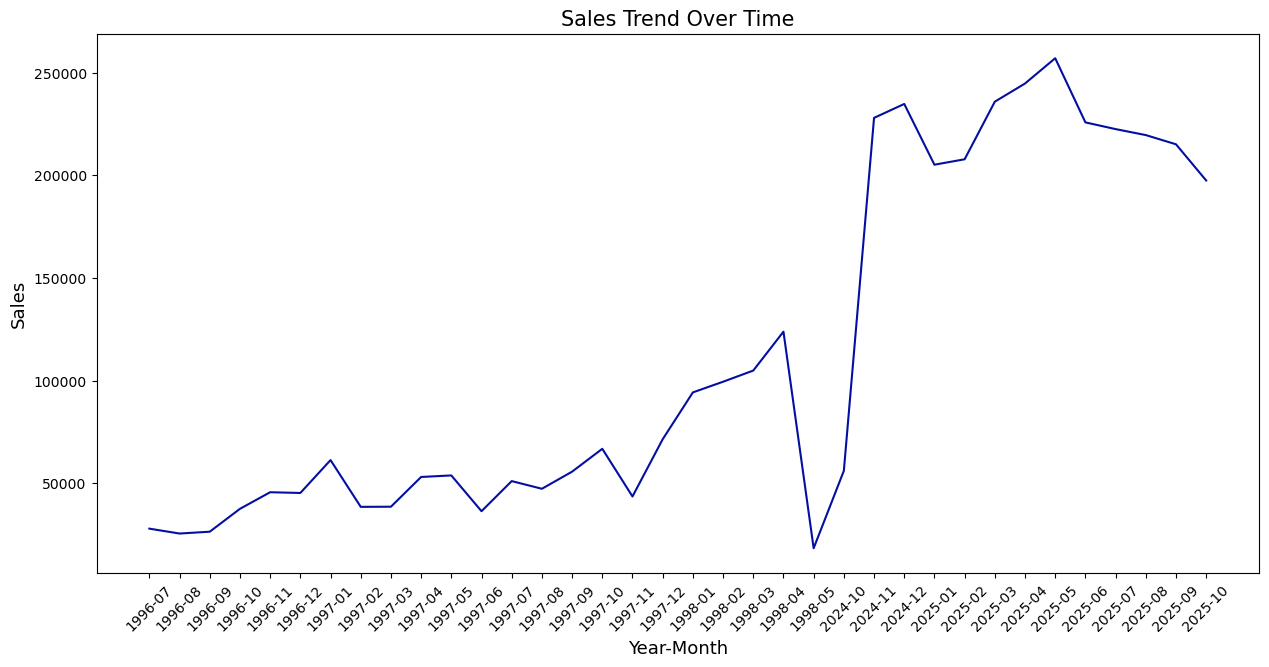

In [26]:
## Display the periods with the highest sales and analyze the sales trend over time.

plt.figure(figsize=(15, 7))
plt.plot(highlysales.index.strftime('%Y-%m'), highlysales.values, color='#020fa1')
plt.title('Sales Trend Over Time', fontsize=15)
plt.xlabel('Year-Month', fontsize=13)
plt.ylabel('Sales', fontsize=13)
plt.xticks(rotation=45)
plt.show()

In [27]:
## Display the top10 country with the highest sales.

best_country =orders.groupby('ShipCountry')['sales'].max().sort_values(ascending=False).head(10).round(0)
print(best_country,'\n')

worst_country =orders.groupby('ShipCountry')['sales'].max().sort_values(ascending=True).head(10).round(0)
print(worst_country)


ShipCountry
Brazil         15810.0
Germany        15019.0
USA            10540.0
Denmark        10540.0
Ireland         9903.0
Austria         8432.0
Canada          8263.0
Sweden          4642.0
Switzerland     4456.0
Mexico          3952.0
Name: sales, dtype: float64 

ShipCountry
Poland        592.0
Argentina    1215.0
Portugal     1238.0
Italy        1253.0
Finland      1310.0
Norway       2108.0
Spain        2476.0
Venezuela    2640.0
Belgium      2750.0
France       3465.0
Name: sales, dtype: float64


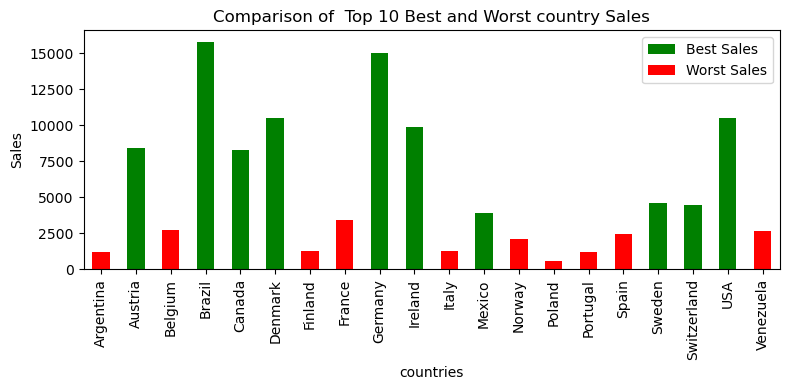

In [28]:
# Combine best and worst into a DataFrame for plotting
stacked_data = pd.DataFrame({
    'Best Sales': best_country,
    'Worst Sales': worst_country
})

# Plotting
stacked_data.plot(kind='bar', stacked=True, figsize=(8, 4), color=['green', 'red'])

# Adding title and labels
plt.title('Comparison of  Top 10 Best and Worst country Sales')
plt.xlabel('countries')
plt.ylabel('Sales')

# Showing the plot
plt.tight_layout()  # To ensure labels don't get cut off
plt.show()

In [29]:
orders

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipCountry,ProductID,UnitPrice,Quantity,Discount,CompanyName,ContactName,ContactTitle,Address,City,Country,Phone,year-month,sales
0,2,SAVEA,4,2025-03-20 17:21:27.393,2025-03-26 17:21:27.393,2025-03-22 17:21:27.393,1,73.97,Company 295,383 Example St,Phoenix,USA,65,17.70,4,0.08,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,USA,(208) 555-8097,2025-03,65.136000
1,2,SAVEA,4,2025-03-20 17:21:27.393,2025-03-26 17:21:27.393,2025-03-22 17:21:27.393,1,73.97,Company 295,383 Example St,Phoenix,USA,71,13.92,6,0.43,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,USA,(208) 555-8097,2025-03,47.606399
2,274,SAVEA,2,2025-10-14 17:21:27.967,2025-10-28 17:21:27.967,2025-10-18 17:21:27.967,3,86.64,Company 190,128 Example St,New York,USA,7,89.88,2,0.97,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,USA,(208) 555-8097,2025-10,5.392795
3,274,SAVEA,2,2025-10-14 17:21:27.967,2025-10-28 17:21:27.967,2025-10-18 17:21:27.967,3,86.64,Company 190,128 Example St,New York,USA,8,38.55,5,0.81,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,USA,(208) 555-8097,2025-10,36.622500
4,274,SAVEA,2,2025-10-14 17:21:27.967,2025-10-28 17:21:27.967,2025-10-18 17:21:27.967,3,86.64,Company 190,128 Example St,New York,USA,24,95.47,10,0.01,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,USA,(208) 555-8097,2025-10,945.153000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,10943,BSBEV,4,1998-03-11 00:00:00.000,1998-04-08 00:00:00.000,1998-03-19 00:00:00.000,2,2.17,B's Beverages,Fauntleroy Circus,London,UK,22,21.00,21,0.00,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,UK,(171) 555-1212,1998-03,441.000000
21888,10943,BSBEV,4,1998-03-11 00:00:00.000,1998-04-08 00:00:00.000,1998-03-19 00:00:00.000,2,2.17,B's Beverages,Fauntleroy Circus,London,UK,46,12.00,15,0.00,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,UK,(171) 555-1212,1998-03,180.000000
21889,10947,BSBEV,3,1998-03-13 00:00:00.000,1998-04-10 00:00:00.000,1998-03-16 00:00:00.000,2,3.26,B's Beverages,Fauntleroy Circus,London,UK,59,55.00,4,0.00,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,UK,(171) 555-1212,1998-03,220.000000
21890,11023,BSBEV,1,1998-04-14 00:00:00.000,1998-04-28 00:00:00.000,1998-04-24 00:00:00.000,2,123.83,B's Beverages,Fauntleroy Circus,London,UK,7,30.00,4,0.00,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,UK,(171) 555-1212,1998-04,120.000000


In [30]:
top10_customers = orders.groupby(['CustomerID', 'CompanyName'])['sales'].sum().sort_values(ascending = False).head().round(0)
print('Below are the top 5 key customers by sales: \n',pd.DataFrame(top10_customers))

Below are the top 5 key customers by sales: 
                                             sales
CustomerID CompanyName                           
QUICK      QUICK-Stop                    145853.0
ERNSH      Ernst Handel                  137805.0
SAVEA      Save-a-lot Markets            134631.0
RATTC      Rattlesnake Canyon Grocery     91524.0
HUNGO      Hungry Owl All-Night Grocers   91056.0


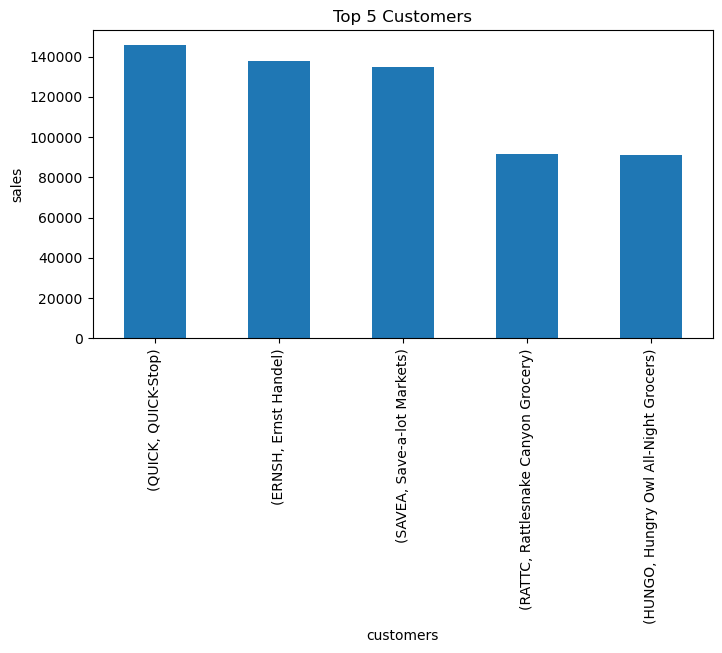

In [31]:
## top 10 customers by sales additional city and titles.



#plot
plt.figure(figsize=(8,4))
top10_customers.plot(kind='bar',title="Top 5 Customers")
plt.xlabel("customers")
plt.xticks(rotation = 90)
plt.ylabel("sales")
plt.show()

In [37]:
orders

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipCountry,ProductID,UnitPrice,Quantity,Discount,CompanyName,ContactName,ContactTitle,Address,City,Country,Phone,year-month,sales
0,2,SAVEA,4,2025-03-20 17:21:27.393,2025-03-26 17:21:27.393,2025-03-22 17:21:27.393,1,73.97,Company 295,383 Example St,Phoenix,USA,65,17.70,4,0.08,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,USA,(208) 555-8097,2025-03,65.136000
1,2,SAVEA,4,2025-03-20 17:21:27.393,2025-03-26 17:21:27.393,2025-03-22 17:21:27.393,1,73.97,Company 295,383 Example St,Phoenix,USA,71,13.92,6,0.43,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,USA,(208) 555-8097,2025-03,47.606399
2,274,SAVEA,2,2025-10-14 17:21:27.967,2025-10-28 17:21:27.967,2025-10-18 17:21:27.967,3,86.64,Company 190,128 Example St,New York,USA,7,89.88,2,0.97,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,USA,(208) 555-8097,2025-10,5.392795
3,274,SAVEA,2,2025-10-14 17:21:27.967,2025-10-28 17:21:27.967,2025-10-18 17:21:27.967,3,86.64,Company 190,128 Example St,New York,USA,8,38.55,5,0.81,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,USA,(208) 555-8097,2025-10,36.622500
4,274,SAVEA,2,2025-10-14 17:21:27.967,2025-10-28 17:21:27.967,2025-10-18 17:21:27.967,3,86.64,Company 190,128 Example St,New York,USA,24,95.47,10,0.01,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,USA,(208) 555-8097,2025-10,945.153000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,10943,BSBEV,4,1998-03-11 00:00:00.000,1998-04-08 00:00:00.000,1998-03-19 00:00:00.000,2,2.17,B's Beverages,Fauntleroy Circus,London,UK,22,21.00,21,0.00,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,UK,(171) 555-1212,1998-03,441.000000
21888,10943,BSBEV,4,1998-03-11 00:00:00.000,1998-04-08 00:00:00.000,1998-03-19 00:00:00.000,2,2.17,B's Beverages,Fauntleroy Circus,London,UK,46,12.00,15,0.00,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,UK,(171) 555-1212,1998-03,180.000000
21889,10947,BSBEV,3,1998-03-13 00:00:00.000,1998-04-10 00:00:00.000,1998-03-16 00:00:00.000,2,3.26,B's Beverages,Fauntleroy Circus,London,UK,59,55.00,4,0.00,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,UK,(171) 555-1212,1998-03,220.000000
21890,11023,BSBEV,1,1998-04-14 00:00:00.000,1998-04-28 00:00:00.000,1998-04-24 00:00:00.000,2,123.83,B's Beverages,Fauntleroy Circus,London,UK,7,30.00,4,0.00,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,UK,(171) 555-1212,1998-04,120.000000


In [40]:
orders.isnull().sum()

OrderID         0
CustomerID      0
EmployeeID      0
OrderDate       0
RequiredDate    0
ShippedDate     0
ShipVia         0
Freight         0
ShipName        0
ShipAddress     0
ShipCity        0
ShipCountry     0
ProductID       0
UnitPrice       0
Quantity        0
Discount        0
CompanyName     0
ContactName     0
ContactTitle    0
Address         0
City            0
Country         0
Phone           0
year-month      0
sales           0
dtype: int64

In [41]:
## check types

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       21892 non-null  int64         
 1   CustomerID    21892 non-null  object        
 2   EmployeeID    21892 non-null  int64         
 3   OrderDate     21892 non-null  datetime64[ns]
 4   RequiredDate  21892 non-null  datetime64[ns]
 5   ShippedDate   21892 non-null  datetime64[ns]
 6   ShipVia       21892 non-null  int64         
 7   Freight       21892 non-null  float64       
 8   ShipName      21892 non-null  object        
 9   ShipAddress   21892 non-null  object        
 10  ShipCity      21892 non-null  object        
 11  ShipCountry   21892 non-null  object        
 12  ProductID     21892 non-null  int64         
 13  UnitPrice     21892 non-null  float64       
 14  Quantity      21892 non-null  int64         
 15  Discount      21892 non-null  float6

In [42]:
orders.columns

Index(['OrderID', 'CustomerID', 'EmployeeID', 'OrderDate', 'RequiredDate',
       'ShippedDate', 'ShipVia', 'Freight', 'ShipName', 'ShipAddress',
       'ShipCity', 'ShipCountry', 'ProductID', 'UnitPrice', 'Quantity',
       'Discount', 'CompanyName', 'ContactName', 'ContactTitle', 'Address',
       'City', 'Country', 'Phone', 'year-month', 'sales'],
      dtype='object')

In [84]:
## cleaning data to fit model 

orders_drop_columns=orders.drop(columns = ['OrderID', 'CustomerID', 'EmployeeID', 'ProductID','ShipName', 'ShipAddress','ShipVia',
       'ShipCity', 'ShipCountry', 'CompanyName', 'ContactName', 'ContactTitle', 'Address','City', 'Country', 'Phone', 'year-month'])
cutstomer_model = orders_drop_columns

cutstomer_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderDate     21892 non-null  datetime64[ns]
 1   RequiredDate  21892 non-null  datetime64[ns]
 2   ShippedDate   21892 non-null  datetime64[ns]
 3   Freight       21892 non-null  float64       
 4   UnitPrice     21892 non-null  float64       
 5   Quantity      21892 non-null  int64         
 6   Discount      21892 non-null  float64       
 7   sales         21892 non-null  float64       
 8   Cluster       21892 non-null  int32         
dtypes: datetime64[ns](3), float64(4), int32(1), int64(1)
memory usage: 1.4 MB


In [85]:
orders

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipCountry,ProductID,UnitPrice,Quantity,Discount,CompanyName,ContactName,ContactTitle,Address,City,Country,Phone,year-month,sales,Cluster
0,2,SAVEA,4,2025-03-20 17:21:27.393,2025-03-26 17:21:27.393,2025-03-22 17:21:27.393,1,73.97,Company 295,383 Example St,Phoenix,USA,65,17.70,4,0.08,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,USA,(208) 555-8097,2025-03,65.136000,2
1,2,SAVEA,4,2025-03-20 17:21:27.393,2025-03-26 17:21:27.393,2025-03-22 17:21:27.393,1,73.97,Company 295,383 Example St,Phoenix,USA,71,13.92,6,0.43,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,USA,(208) 555-8097,2025-03,47.606399,2
2,274,SAVEA,2,2025-10-14 17:21:27.967,2025-10-28 17:21:27.967,2025-10-18 17:21:27.967,3,86.64,Company 190,128 Example St,New York,USA,7,89.88,2,0.97,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,USA,(208) 555-8097,2025-10,5.392795,2
3,274,SAVEA,2,2025-10-14 17:21:27.967,2025-10-28 17:21:27.967,2025-10-18 17:21:27.967,3,86.64,Company 190,128 Example St,New York,USA,8,38.55,5,0.81,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,USA,(208) 555-8097,2025-10,36.622500,2
4,274,SAVEA,2,2025-10-14 17:21:27.967,2025-10-28 17:21:27.967,2025-10-18 17:21:27.967,3,86.64,Company 190,128 Example St,New York,USA,24,95.47,10,0.01,Save-a-lot Markets,Jose Pavarotti,Sales Representative,187 Suffolk Ln.,Boise,USA,(208) 555-8097,2025-10,945.153000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,10943,BSBEV,4,1998-03-11 00:00:00.000,1998-04-08 00:00:00.000,1998-03-19 00:00:00.000,2,2.17,B's Beverages,Fauntleroy Circus,London,UK,22,21.00,21,0.00,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,UK,(171) 555-1212,1998-03,441.000000,0
21888,10943,BSBEV,4,1998-03-11 00:00:00.000,1998-04-08 00:00:00.000,1998-03-19 00:00:00.000,2,2.17,B's Beverages,Fauntleroy Circus,London,UK,46,12.00,15,0.00,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,UK,(171) 555-1212,1998-03,180.000000,0
21889,10947,BSBEV,3,1998-03-13 00:00:00.000,1998-04-10 00:00:00.000,1998-03-16 00:00:00.000,2,3.26,B's Beverages,Fauntleroy Circus,London,UK,59,55.00,4,0.00,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,UK,(171) 555-1212,1998-03,220.000000,0
21890,11023,BSBEV,1,1998-04-14 00:00:00.000,1998-04-28 00:00:00.000,1998-04-24 00:00:00.000,2,123.83,B's Beverages,Fauntleroy Circus,London,UK,7,30.00,4,0.00,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,UK,(171) 555-1212,1998-04,120.000000,2


In [87]:
# Calculating Recency, Frequency, and Monetary features for each customer

## we find the most recent date in the OrderDate column from the orders table.
## This date will help us calculate how long it has been since each customer last placed an order (Recency).
latest_order_date = orders['OrderDate'].max()

# Calculate RFM features

rfm = orders.groupby('CustomerID').agg({
    'OrderDate': lambda x: (latest_order_date - x.max()).days,  # Recency
    'OrderID': 'nunique',                                       # Frequency
    'UnitPrice': 'sum'                                          # Monetary
}).reset_index()
#  we group the data by each customer (CustomerID) to calculate three RFM metrics: Recency, Frequency, and Monetary.

# Recency ('OrderDate': lambda x: (latest_order_date - x.max()).days):

# This calculates the number of days since each customer's last purchase. We use x.max() to get the latest order date for each customer
# then subtract it from latest_order_date to get the days since the last order.
# Lower values indicate more recent purchases, meaning more active customers.

# Frequency ('OrderID': 'nunique'):
# This counts the number of unique orders each customer has placed. Higher frequency indicates a customer who shops more often, which may signify loyalty.

# Monetary ('UnitPrice': 'sum'):
# This calculates the total amount spent by each customer by summing up the UnitPrice for all their orders. Higher monetary values suggest customers who spend more, making them high-value customers.

rfm

,CustomerID,OrderDate,OrderID,UnitPrice
0,ALFKI,7,68,9593.30
1,ANATR,6,81,10199.36
2,ANTON,12,79,11211.14
3,AROUT,0,80,10625.87
4,BERGS,14,94,11619.53
...,...,...,...,...
86,WARTH,5,96,15073.63
87,WELLI,4,93,11802.56
88,WHITC,0,73,11479.87
89,WILMK,14,73,10426.20


In [89]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,ALFKI,7,68,9593.30
1,ANATR,6,81,10199.36
2,ANTON,12,79,11211.14
3,AROUT,0,80,10625.87
4,BERGS,14,94,11619.53
...,...,...,...,...
86,WARTH,5,96,15073.63
87,WELLI,4,93,11802.56
88,WHITC,0,73,11479.87
89,WILMK,14,73,10426.20


In [93]:
## Data Scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm_scaled

array([[ 0.42942999, -1.49263585, -1.30640193],
       [ 0.22695264, -0.16696903, -0.89295097],
       [ 1.44181677, -0.37091777, -0.20271995],
       [-0.98791149, -0.2689434 , -0.60198808],
       [ 1.84677147,  1.1586978 ,  0.07588157],
       [ 0.42942999, -1.90053334, -1.67098728],
       [ 0.8343847 , -0.06499465, -0.74841436],
       [-0.78543413,  0.24092846, -0.27851861],
       [-0.98791149, -0.47289214, -1.24820389],
       [-0.78543413,  1.8725184 ,  1.43868159],
       [-0.78543413, -0.2689434 , -0.05387187],
       [-0.38047942, -2.00250771, -1.66956149],
       [-0.38047942, -1.79855897, -1.17223468],
       [ 1.64429412,  0.03697972, -0.34858001],
       [ 0.02447528, -0.67684088,  0.13837744],
       [-0.78543413, -0.2689434 ,  0.54564771],
       [-0.17800207,  0.4448772 ,  0.17655988],
       [-0.98791149,  0.75080032,  0.60444608],
       [-0.58295678, -0.06499465,  0.01298322],
       [ 1.84677147,  2.79028774,  1.90479799],
       [-0.58295678,  0.03697972, -0.254

# Elbow Mehod

In [109]:
## we follow elbow method to chose what is the best num of clusters 
## fit the model with the corrected data
intertiadict = {}
for i in tqdm(range(2,11)):
    KMeansModel = KMeans(n_clusters = i , init = 'k-means++',random_state=42)
    KMeansModel.fit(rfm_scaled)
    intertiadict[i] = KMeansModel.inertia_

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]C:\Users\win10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\win10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 11%|█████████▎                                                                          | 1/9 [00:01<00:09,  1.13s/it]C:\Users\win10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to 

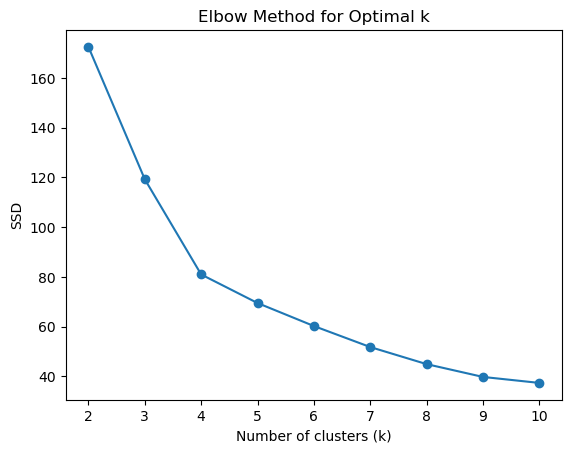

In [110]:
plt.plot(list(intertiadict.keys()), list(intertiadict.values()), marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSD")
plt.title("Elbow Method for Optimal k")
plt.show()

C:\Users\win10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\win10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Summary:
   Cluster    Recency   Frequency      Monetary
0        0   2.315789   88.736842  12400.467895
1        1  13.785714   83.357143  11252.545000
2        2   1.761905   79.666667  11373.471429
3        3   1.928571   70.285714   9796.358571
4        4   6.533333   78.200000  10665.638000
5        5  14.500000  108.000000  15292.630000
6        6   2.666667  103.500000  14591.481667


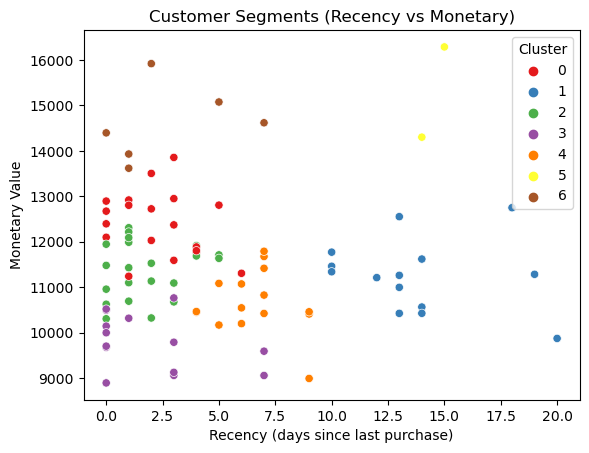

In [116]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 3: Analyze Clusters by calculating the mean values for each feature
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print("Cluster Summary:")
print(cluster_summary)

# Step 4: Visualize Clusters
# Scatter plot using Recency and Monetary for example
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='Set1')
plt.title('Customer Segments (Recency vs Monetary)')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Monetary Value')
plt.show()

In [121]:
rfm['Cluster'] = kmeans.labels_
rfm

,CustomerID,Recency,Frequency,Monetary,Cluster
0,ALFKI,7,68,9593.30,3
1,ANATR,6,81,10199.36,4
2,ANTON,12,79,11211.14,1
3,AROUT,0,80,10625.87,2
4,BERGS,14,94,11619.53,1
...,...,...,...,...,...
86,WARTH,5,96,15073.63,6
87,WELLI,4,93,11802.56,0
88,WHITC,0,73,11479.87,2
89,WILMK,14,73,10426.20,1


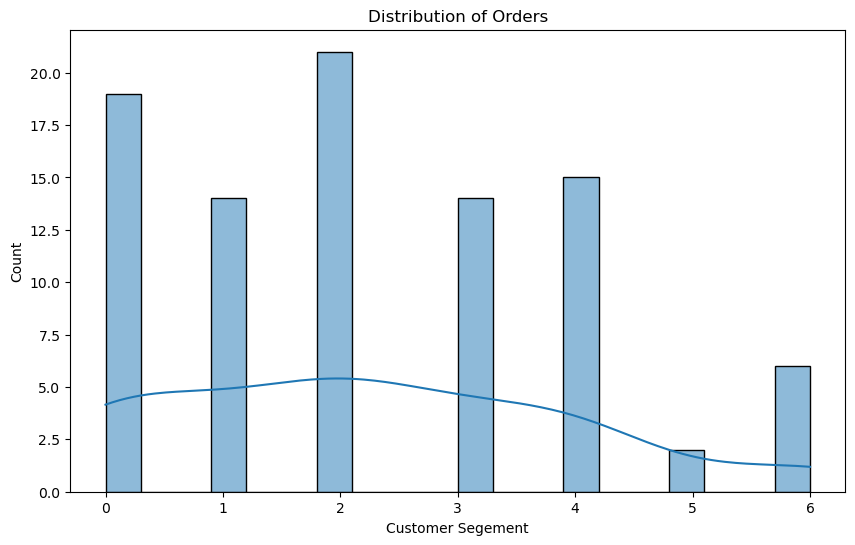

In [136]:
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Cluster'],bins=20, kde=True)
plt.title('Distribution of Orders')
plt.xlabel('Customer Segement')
plt.ylabel('Count')
plt.show()

# Thank You